## Imports

In [1]:
#!pip install plotly

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# import plotly.plotly as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.tools as tls

init_notebook_mode(connected=True)
# tls.set_credentials_file(username='owencallen', api_key='QSH0OAhYDmgvVKQaZ11M')

## Load data

In [2]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
spray_df = pd.read_csv('../input/spray.csv')

## 1st look at DataFrames

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.0+ KB


In [4]:
train_df.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [5]:
train_df = train_df[['Date', 'Species', 'Trap', 'Latitude', 'Longitude','NumMosquitos', 'WnvPresent']]
train_df.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0


In [6]:
test_df.columns

Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy'],
      dtype='object')

In [7]:
test_df = test_df[['Date', 'Species', 'Trap', 'Latitude', 'Longitude']]
test_df.head()

,Date,Species,Trap,Latitude,Longitude
0,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991
1,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991
2,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991
3,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991
4,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991


In [8]:
spray_df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude'], dtype='object')

In [9]:
spray_df = spray_df[['Date', 'Latitude', 'Longitude']]
spray_df.head()

,Date,Latitude,Longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858


In [10]:
train_df.columns

Index(['Date', 'Species', 'Trap', 'Latitude', 'Longitude', 'NumMosquitos',
       'WnvPresent'],
      dtype='object')

In [11]:
train_df['Species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

Why are PIPIENS/RESTUANS not split?

In [12]:
train_df['Trap'].value_counts().head()

T900    750
T115    542
T138    314
T002    185
T135    183
Name: Trap, dtype: int64

In [13]:
test_df['Trap'].value_counts().head()

T009    1528
T035    1520
T900    1468
T002     857
T008     822
Name: Trap, dtype: int64

## Distibution of dates and observastions

In [14]:
spray_df['Date'].value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2011-09-07    2114
2013-07-25    1607
2013-08-22    1587
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: Date, dtype: int64

In [15]:
train_dates = train_df['Date'].value_counts()
train_dates.sort_index(inplace=True)
train_dates.index = pd.to_datetime(train_dates.index)

In [16]:
test_dates = test_df['Date'].value_counts()
test_dates.sort_index(inplace=True)
test_dates.index = pd.to_datetime(test_dates.index)

In [17]:
spray_dates = spray_df['Date'].value_counts()
spray_dates.sort_index(inplace=True)
spray_dates.index = pd.to_datetime(spray_dates.index)

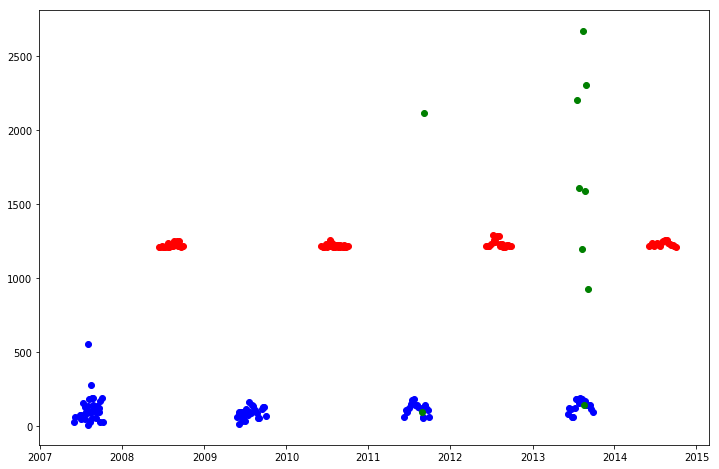

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(train_dates.index, train_dates, c='b')
plt.scatter(test_dates.index, test_dates, c='r')
plt.scatter(spray_dates.index, spray_dates, c='g');

## Time graph

In [19]:
train_2013 = train_df

In [20]:
train_df['Date'] == '2013'

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
10476    False
10477    False
10478    False
10479    False
10480    False
10481    False
10482    False
10483    False
10484    False
10485    False
10486    False
10487    False
10488    False
10489    False
10490    False
10491    False
10492    False
10493    False
10494    False
10495    False
10496    False
10497    False
10498    False
10499    False
10500    False
10501    False
10502    False
10503    False
10504    False
10505    False
Name: Date, Length: 10506, dtype: bool

## Plotly mapping function

In [21]:
def plotly_graph(df):
    data = [{
        'type' : 'scattergeo',
        'locationmode' : 'USA-states',
        'lon' : df['Longitude'],
        'lat' : df['Latitude'],
        'marker' : {
            'size' : 12,
            'autocolorscale' : False,
            'colorscale' : 'custom-colorscale',
            'color' : df['NumMosquitos'], #target being measured
            'colorbar' : {
                'title' : 'Mosquitos present'
            }
        }
    }]

    layout = {
        'title' : 'Species sightings in Chicago',
        'geo' : {
#             'scope' : 'usa',
            'projection' : {'type' : 'albers usa'},
            'showland' : True,
            'landcolor' : 'rgb(250,250,250)',
            'subunitcolor' : 'rgb(210,210,210)',
            'contrycolor' : 'rgb(200,200,200)',
            'contrywidth' : 0.5, 
            'subunitwidth' : 0.5,
            'lonaxis': { 'range': [-86, -88] },
            'lataxis': { 'range': [40, 42] }
        }
    }

    fig = {
        'data':data,
        'layout':layout
    }
    
    return fig

In [22]:
df = train_df[train_df['Date']=='2007-05-29']
fig = plotly_graph(df)
iplot(fig, validate = False)#, filename='d3-Species-map')

In [27]:
df = train_df[train_df['Date']=='2007-05-29']
fig = plotly_graph(df)
iplot(fig, validate = False, filename='d3-Species-map')

In [28]:
df = train_df
fig = plotly_graph(df)
iplot(fig, validate = False, filename='d3-Species-map')